In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


In [2]:
data = pd.read_csv('../data/realtor-data.csv')  # load in data
df1 = data[data['state'] == 'California']  # filtering just the data from California 
df1 = df1.dropna() # Delets all rows that have an NA value in them so we dont have to deal with them in ML model

## Data PreProcessing and Cleaning
***


In [3]:
df1.sample(15)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2140303,90671.0,sold,1395000.0,4.0,2.0,0.22,178625.0,Walnut Creek,California,94597.0,1799.0,2021-12-08
2163125,71210.0,sold,475000.0,6.0,4.0,0.25,1732294.0,Sacramento,California,95828.0,925.0,2021-12-15
2130421,84404.0,sold,469950.0,2.0,1.0,0.05,1048064.0,Oakland,California,94602.0,612.0,2022-03-08
1271355,22280.0,for_sale,1390000.0,4.0,3.0,0.25,499371.0,Granada Hills,California,91344.0,2090.0,2021-11-19
1291444,53016.0,for_sale,399000.0,3.0,2.0,0.14,1218255.0,Palm Desert,California,92211.0,1400.0,2015-07-21
1316843,74691.0,for_sale,435000.0,3.0,3.0,0.13,1517682.0,Lancaster,California,93535.0,1661.0,2018-02-28
2167042,109978.0,sold,475000.0,3.0,2.0,0.14,1684553.0,Citrus Heights,California,95610.0,1655.0,2022-02-28
2064866,78932.0,sold,1950000.0,3.0,3.0,4.76,624179.0,Pacific Palisades,California,90272.0,2871.0,2022-03-10
1252942,24186.0,for_sale,2495000.0,3.0,3.0,0.35,1803024.0,Truckee,California,96161.0,2165.0,2022-04-19
1276207,25328.0,for_sale,799000.0,3.0,2.0,0.18,428194.0,Chino Hills,California,91709.0,1000.0,1980-06-25


In [4]:
# taking a subset of the data to find the price of homes specifically in the Bay Area

# List of cities in the bay area
cities_to_include = ['Alameda', 'El Cerrito',	'Mountain View',	'San Leandro',
'Albany',	'Emeryville',	'Napa',	'San Mateo',
'American', 'Canyon',	'Fairfax',	'Newark', 'San Pablo'
'Antioch',	'Fairfield',	'Novato',	'San Rafael',
'Atherton',	'Foster City',	'Oakland',	'San Ramon',
'Belmont',	'Fremont',	'Oakley',	'Santa Clara',
'Belvedere',	'Gilroy',	'Orinda',	'Santa Rosa',
'Benicia'	,'Half Moon Bay',	'Pacifica',	'Saratoga',
'Berkeley',	'Hayward',	'Palo Alto',	'Sausalito',
'Brentwood',	'Healdsburg',	'Petaluma',	'Sebastopol',
'Brisbane',	'Hercules',	'Piedmont',	'Sonoma',
'Burlingame',	'Hillsborough',	'Pinole',	'South San Francisco',
'Calistoga',	'Lafayette',	'Pittsburg',	'St. Helena',
'Campbell',	'Larkspur',	'Pleasant Hill',	'Suisun City',
'Clayton',	'Livermore',	'Pleasanton',	'Sunnyvale',
'Cloverdale',	'Los Altos',	'Portola Valley',	'Tiburon'
'Colma',	'Los Altos Hills',	'Redwood City',	'Union City',
'Concord',	'Los Gatos',	'Richmond',	'Vacaville',
'Corte Madera',	'Martinez',	'Rio Vista',	'Vallejo',
'Cotati',	'Menlo Park',	'Rohnert Park',	'Walnut Creek',
'Cupertino',	'Mill Valley','Ross','Windsor',
'Daly City',	'Millbrae',	'San Anselmo'	,'Woodside',
'Danville',	'Milpitas',	'San Bruno',	'Yountville',
'Dixon',	'Monte Sereno',	'San Carlos',	 
'Dublin',	'Moraga',	'San Francisco',	 
'East Palo Alto',	'Morgan Hill',	'San Jose']  # replace with actual city names

# Your original DataFrame is assumed to be named 'original_df'
# Initialize an empty DataFrame to store concatenated rows
df2 = pd.DataFrame()

for city in cities_to_include:
    # Filter the rows where the city column is equal to the current city
    city_df = df1[df1['city'].isin([city])]
    # Concatenate the filtered rows into the larger DataFrame
    df2 = pd.concat([df2, city_df], ignore_index=True)
df2



,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,19788.0,for_sale,1500000.0,4.0,2.0,0.08,574552.0,Alameda,California,94501.0,1617.0,2007-06-15
1,53016.0,for_sale,1399000.0,4.0,4.0,0.06,1208853.0,Alameda,California,94501.0,2510.0,2015-06-30
2,75693.0,for_sale,475000.0,1.0,1.0,0.85,294964.0,Alameda,California,94501.0,701.0,2003-06-18
3,82024.0,for_sale,999000.0,2.0,2.0,0.12,408805.0,Alameda,California,94501.0,1288.0,2020-11-09
4,75693.0,for_sale,1395000.0,5.0,4.0,0.14,65968.0,Alameda,California,94501.0,2396.0,2022-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...
29146,83949.0,sold,1115000.0,3.0,3.0,0.04,848712.0,San Jose,California,95125.0,1620.0,2022-04-02
29147,72764.0,sold,998000.0,3.0,3.0,0.04,164572.0,San Jose,California,95125.0,1260.0,2022-04-01
29148,16829.0,sold,2599000.0,6.0,4.0,0.21,278550.0,San Jose,California,95125.0,3141.0,2022-04-14
29149,109978.0,sold,3750000.0,4.0,4.0,0.40,429848.0,San Jose,California,95125.0,4109.0,2022-04-12


In [5]:
# drop the columns that we wont need to predict a house's price
df3 = df2.drop(['status', 'brokered_by', 'prev_sold_date'], axis = "columns")
df3.head()

,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
0,1500000.0,4.0,2.0,0.08,574552.0,Alameda,California,94501.0,1617.0
1,1399000.0,4.0,4.0,0.06,1208853.0,Alameda,California,94501.0,2510.0
2,475000.0,1.0,1.0,0.85,294964.0,Alameda,California,94501.0,701.0
3,999000.0,2.0,2.0,0.12,408805.0,Alameda,California,94501.0,1288.0
4,1395000.0,5.0,4.0,0.14,65968.0,Alameda,California,94501.0,2396.0


In [6]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price'] / df4['house_size']
df4 = df4.drop('state', axis= 'columns')

In [7]:
len(df4['street'].unique())

26379

In [8]:
df4


,price,bed,bath,acre_lot,street,city,zip_code,house_size,price_per_sqft
0,1500000.0,4.0,2.0,0.08,574552.0,Alameda,94501.0,1617.0,927.643785
1,1399000.0,4.0,4.0,0.06,1208853.0,Alameda,94501.0,2510.0,557.370518
2,475000.0,1.0,1.0,0.85,294964.0,Alameda,94501.0,701.0,677.603424
3,999000.0,2.0,2.0,0.12,408805.0,Alameda,94501.0,1288.0,775.621118
4,1395000.0,5.0,4.0,0.14,65968.0,Alameda,94501.0,2396.0,582.220367
...,...,...,...,...,...,...,...,...,...
29146,1115000.0,3.0,3.0,0.04,848712.0,San Jose,95125.0,1620.0,688.271605
29147,998000.0,3.0,3.0,0.04,164572.0,San Jose,95125.0,1260.0,792.063492
29148,2599000.0,6.0,4.0,0.21,278550.0,San Jose,95125.0,3141.0,827.443489
29149,3750000.0,4.0,4.0,0.40,429848.0,San Jose,95125.0,4109.0,912.630810


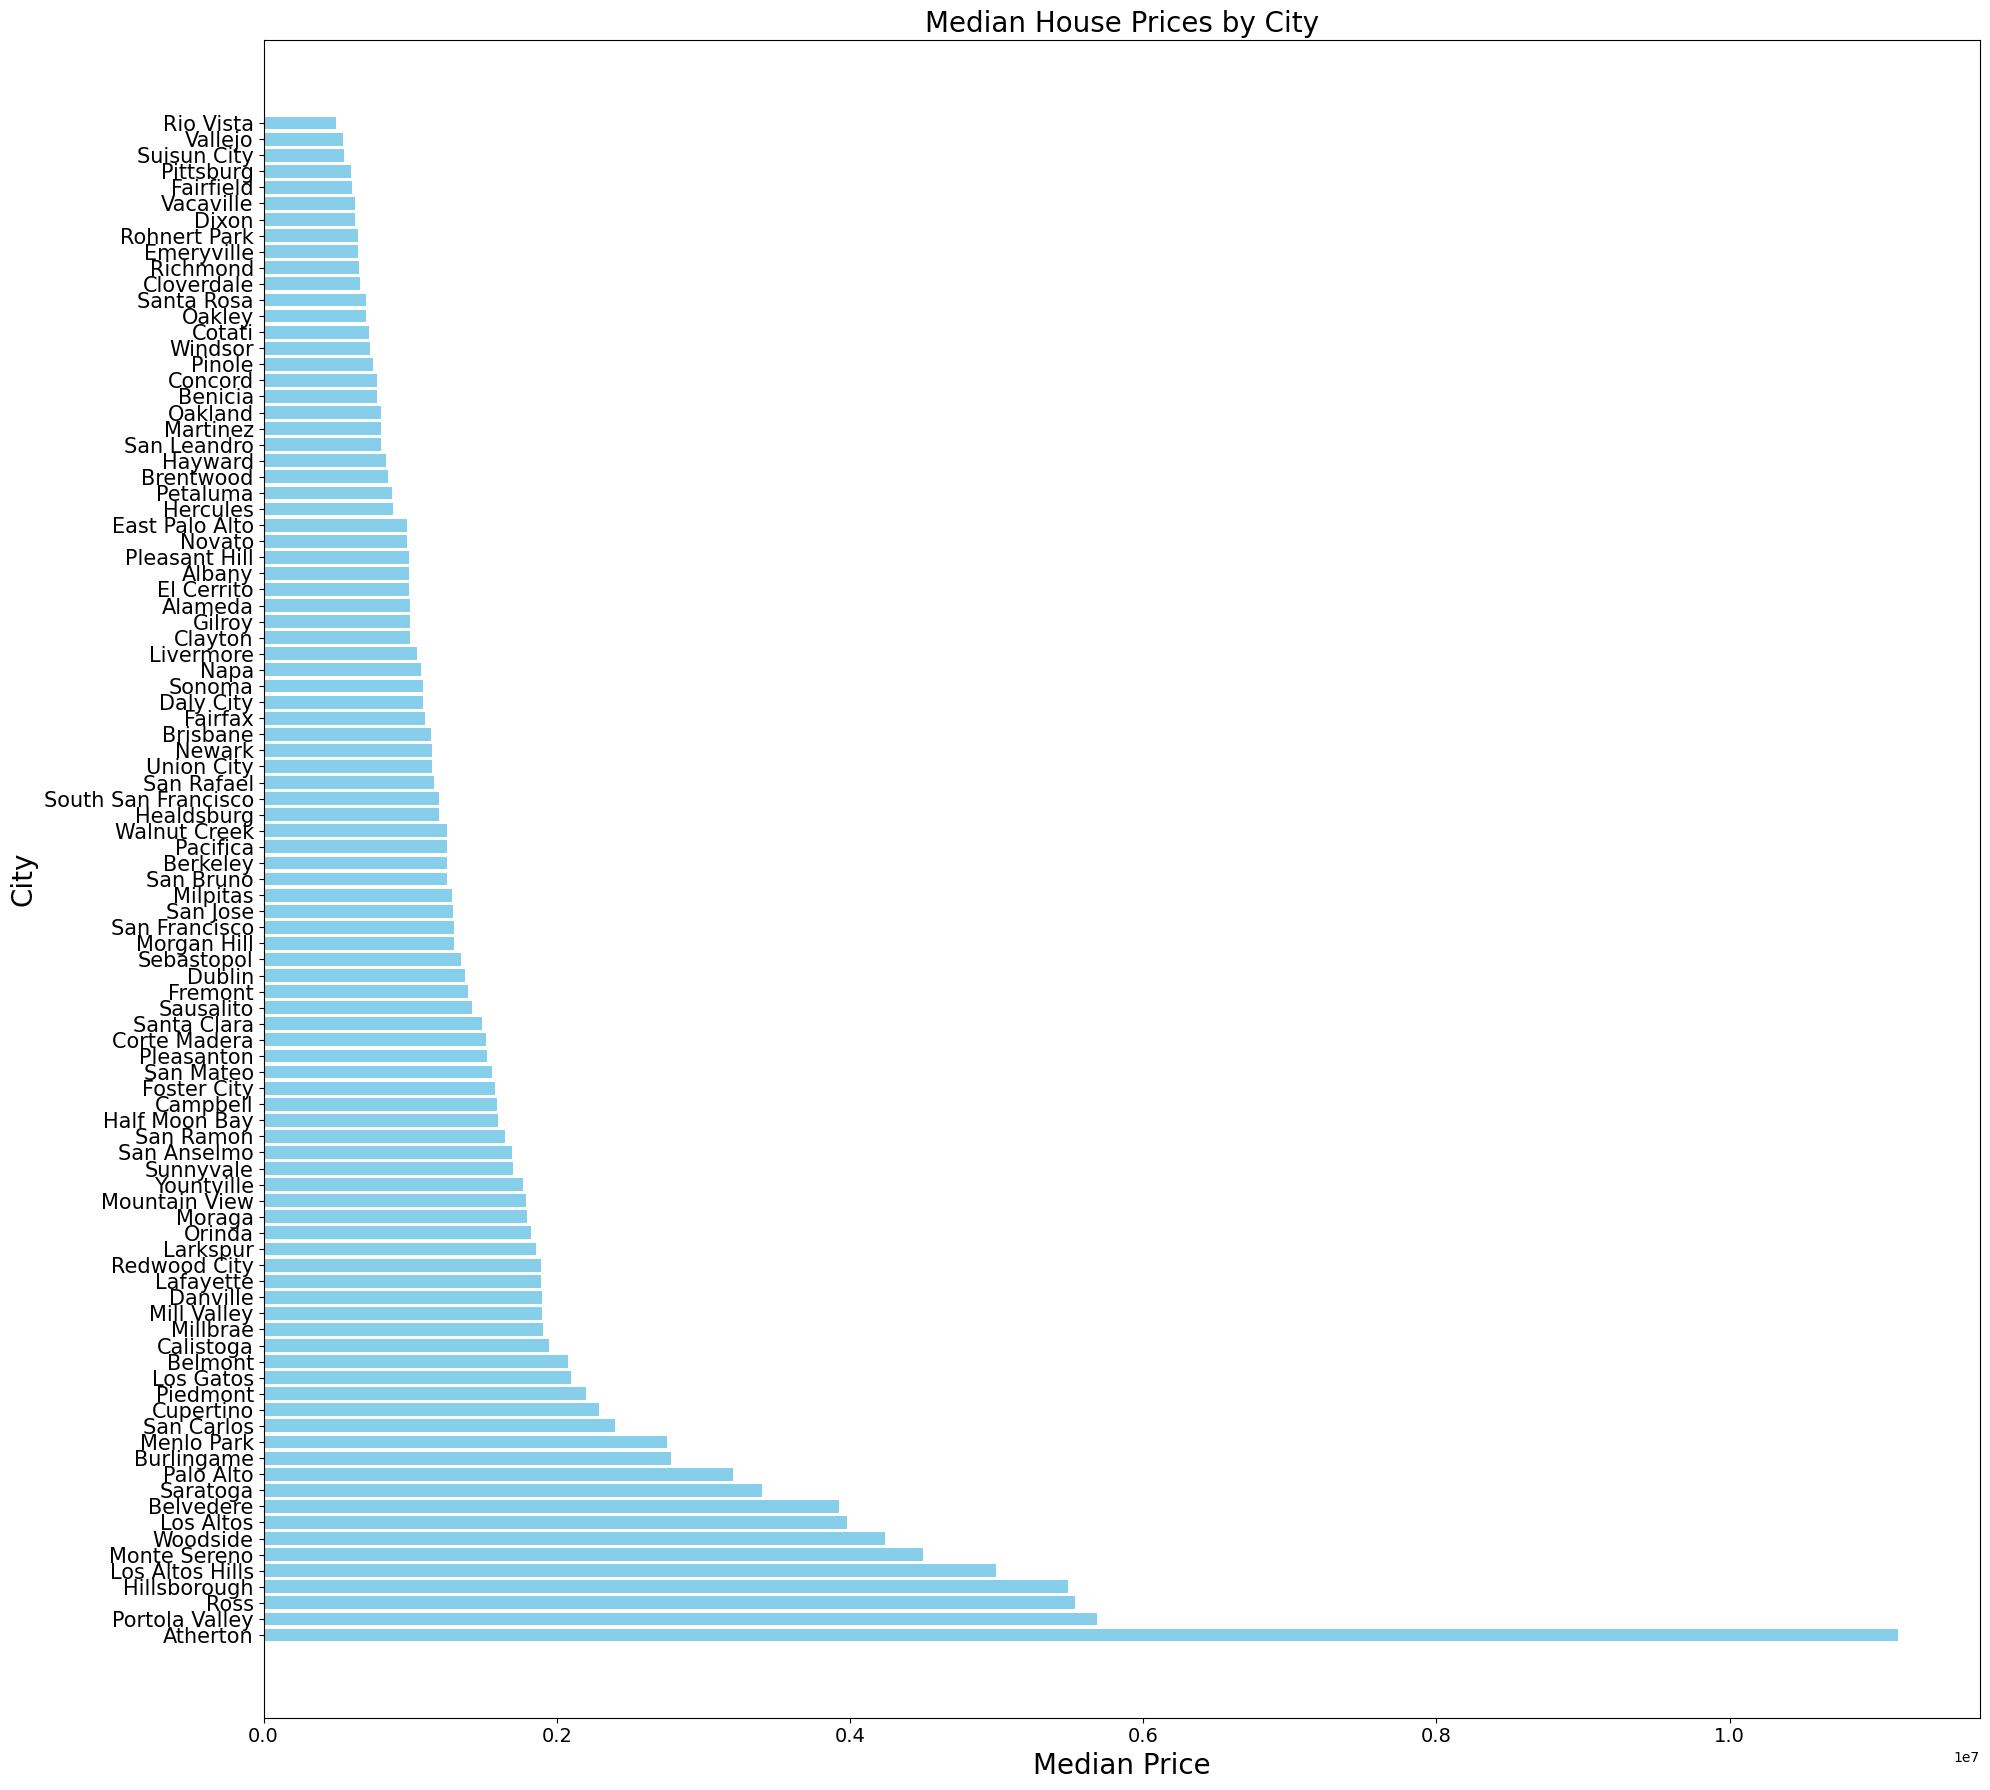

In [9]:
# Sort the DataFrame by 'price' in ascending order
city_median_prices = df4.groupby('city')['price'].median().reset_index()
city_median_prices_sorted = city_median_prices.sort_values(by='price', ascending=False)

# Increase the figure size
plt.figure(figsize=(20, 18))  # You can adjust the dimensions as needed

# Create the barh plot with adjusted label size
plt.barh(city_median_prices_sorted['city'], city_median_prices_sorted['price'], color='skyblue')
plt.xlabel('Median Price', fontsize=20)
plt.ylabel('City', fontsize=20)
plt.title('Median House Prices by City', fontsize=20)
plt.xticks(fontsize=14)  # Adjust font size for x-axis ticks
plt.yticks(fontsize=15)  # Adjust font size for y-axis ticks

# This will adjust the layout to be more spread out
plt.tight_layout()

plt.show()

### Outlier Detection

In [10]:
df4.shape

(29151, 9)

In [11]:
# Outlier Detection and Removal

def remove_outliers(df):
    df_cleaned = pd.DataFrame()
    for i, tempdf in df.groupby('city'):
        m = np.mean(tempdf.price_per_sqft)
        st = np.std(tempdf.price_per_sqft)
        reduced_df = tempdf[(tempdf.price_per_sqft > (m-st)) & (tempdf.price_per_sqft <= (m+st))]
        df_cleaned = pd.concat([df_cleaned,reduced_df],ignore_index = True)
    return df_cleaned

In [12]:
df5 = df4.copy()
df5 = remove_outliers(df5)

In [13]:
df5.shape

(21337, 9)

## Testing Baseline Model Only with Numerical Data 
*** 

In [14]:
selected_numerical = df5[['price', 'bed', 'bath', 'acre_lot', 'house_size']] #just testing a simple linear regression model with only integeral values to get a baseline accuracy scoe

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X = selected_numerical[['bed', 'bath', 'acre_lot', 'house_size']]
y = selected_numerical['price']

# Scaling the features and target
#X_standardized = scaler.fit_transform(X)
#y_standardized = scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Accuracy of LinearRegression on test set: {:.2f}'
     .format(linreg.score(X_test, y_test))) # pretty bad score, lets improve on it now

Accuracy of LinearRegression on test set: 0.60


### Introducing Categorical Data

first we will look at zip codes and how to handle them

In [17]:

df5['zip_code'] = df5['zip_code'].astype(str) #change all zip codes to strings
df5['zip_code'] = df5['zip_code'].apply(lambda x: str(x).split('.')[0]) #all of the ip codes have .0 at the end so lets now reomve the last 2 characters from each zip code


average_price_per_zip = df5.groupby('zip_code')['price'].mean().reset_index()
average_price_per_zip



,zip_code,price
0,93012,2.259444e+06
1,94002,2.322989e+06
2,94005,1.221094e+06
3,94010,4.416340e+06
4,94014,9.942591e+05
...,...,...
213,95476,1.402875e+06
214,95492,7.481042e+05
215,95620,6.345470e+05
216,95687,5.894671e+05


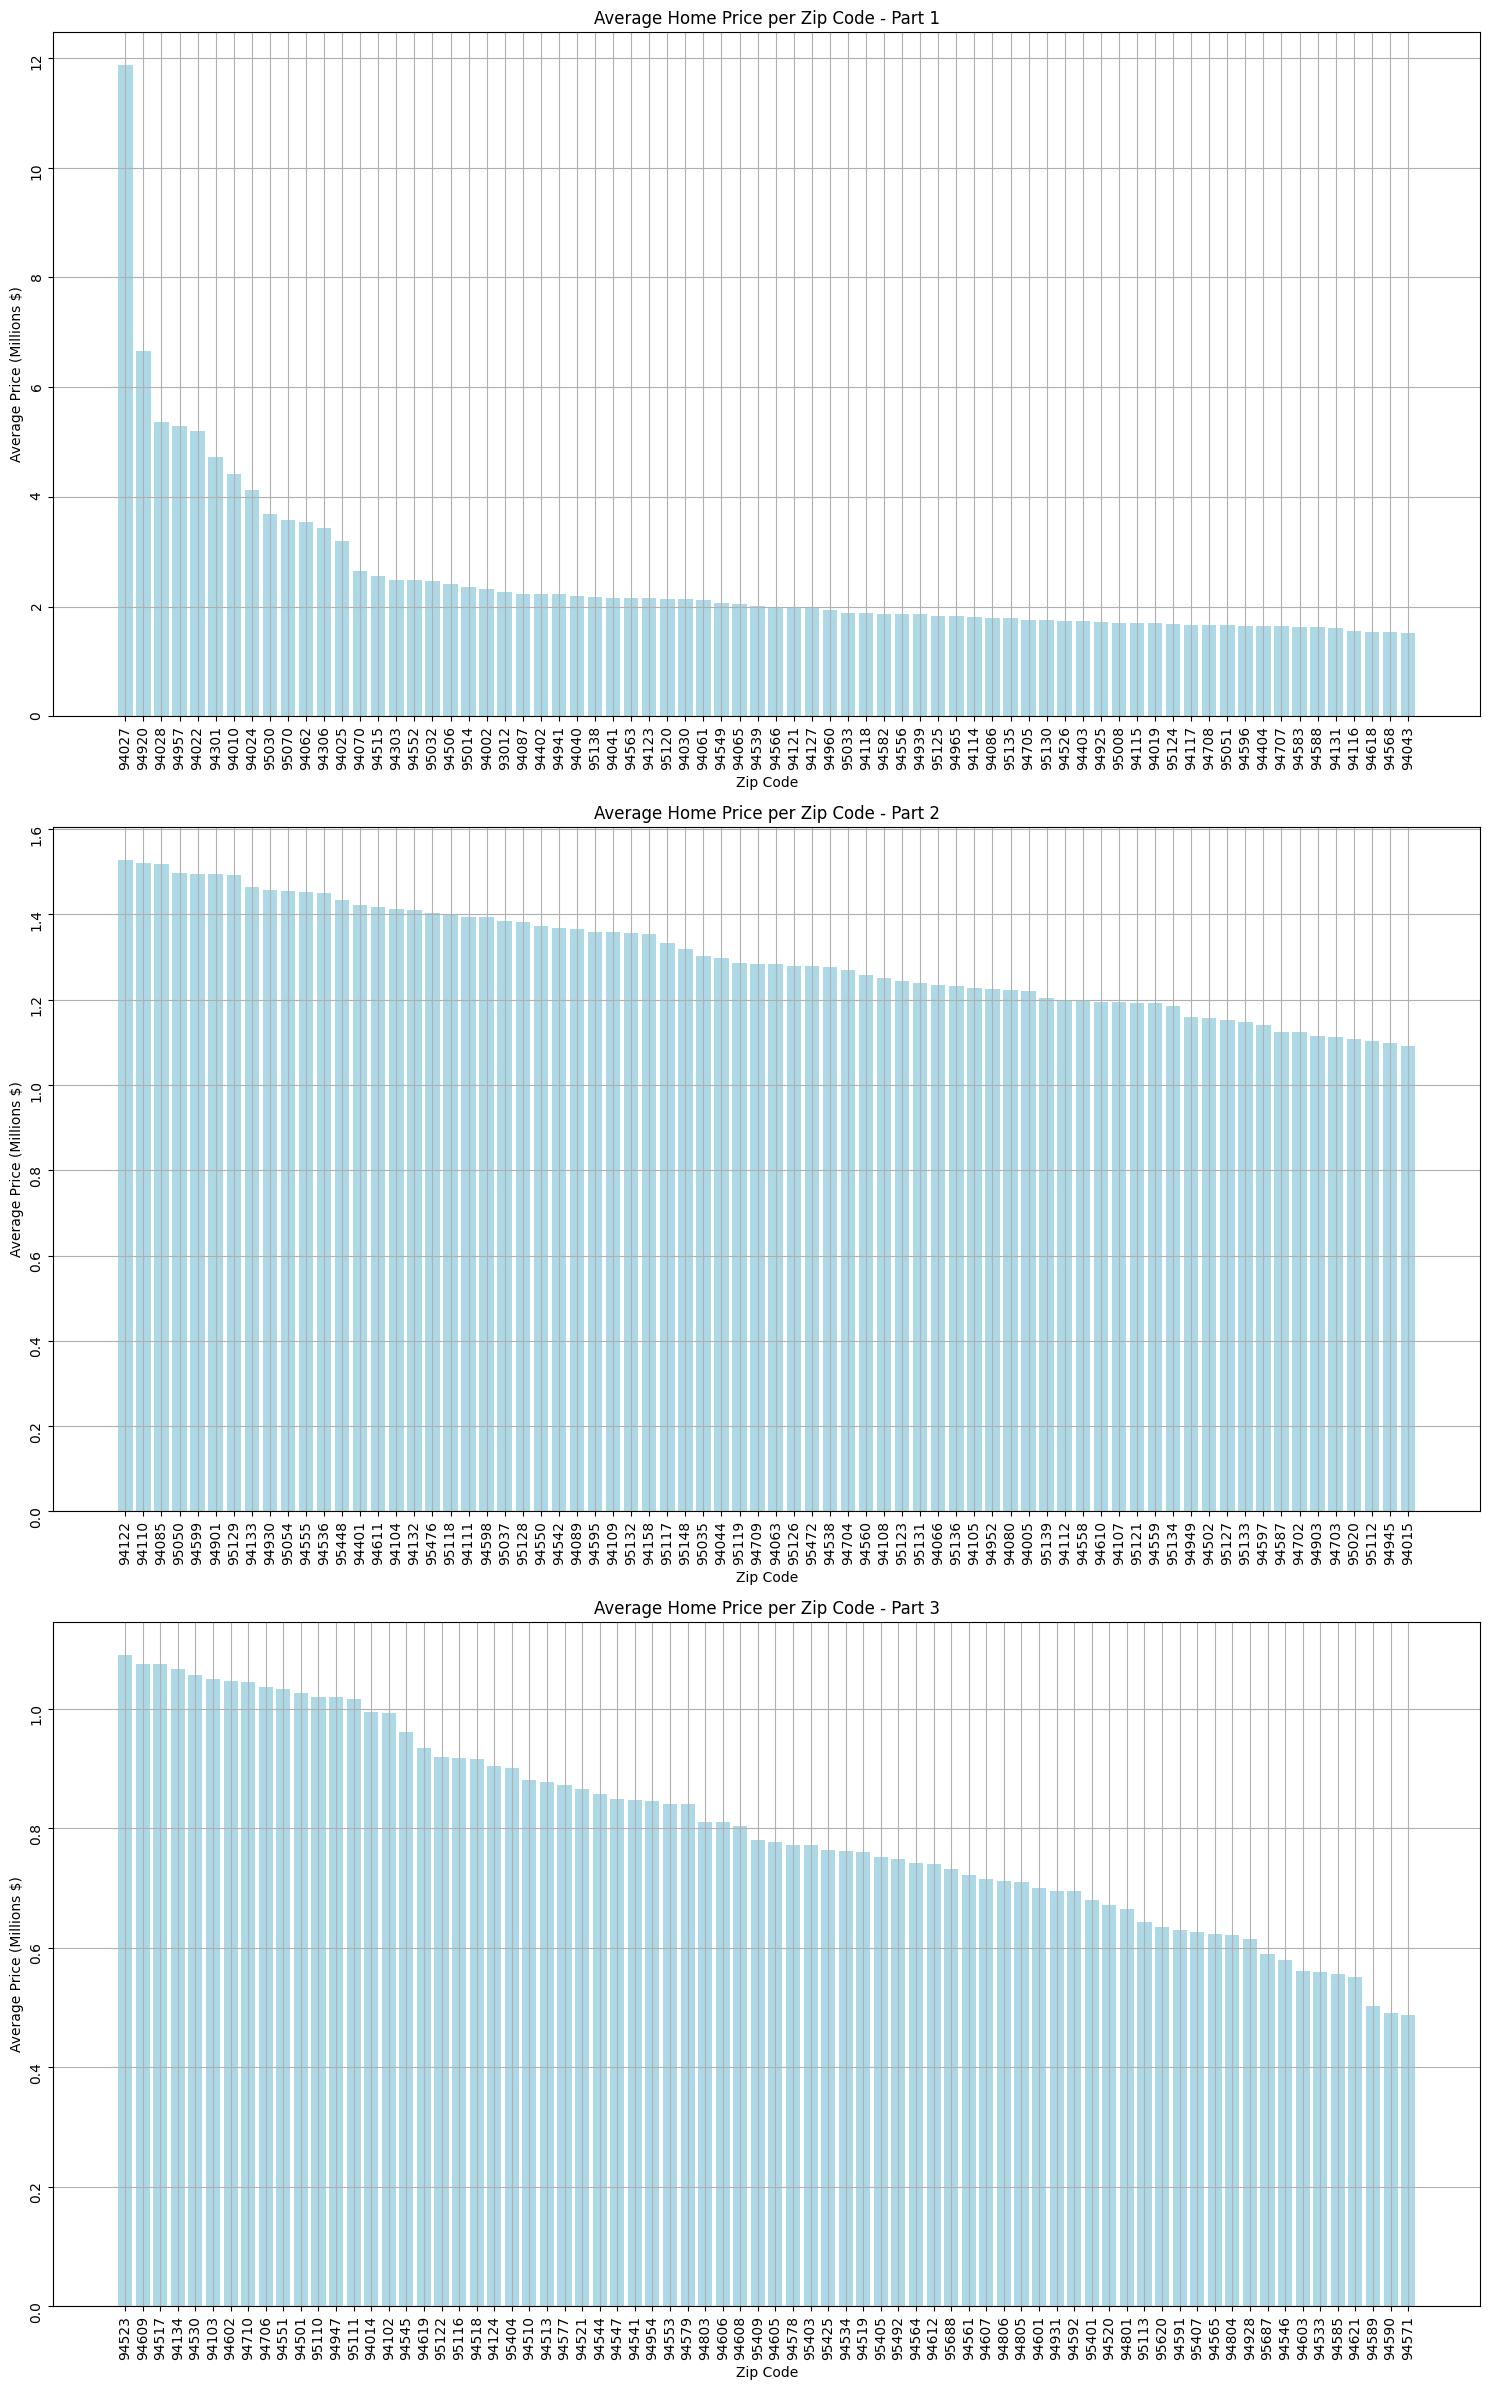

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_average_prices_multiple_subplots(zip_prices, num_subplots=2):
    # Sorting the zip codes by price for better analysis
    zip_prices_sorted = zip_prices.sort_values('price', ascending=False).reset_index(drop=True)
    total_zip_codes = len(zip_prices_sorted)
    zip_codes_per_subplot = total_zip_codes // num_subplots

    fig, axs = plt.subplots(num_subplots, 1, figsize=(15, 8 * num_subplots))

    for i in range(num_subplots):
        start_index = i * zip_codes_per_subplot
        if i == num_subplots - 1:  # Ensure the last subplot includes all remaining zip codes
            end_index = total_zip_codes
        else:
            end_index = start_index + zip_codes_per_subplot

        axs[i].bar(zip_prices_sorted['zip_code'].astype(str)[start_index:end_index], 
                   zip_prices_sorted['price'][start_index:end_index]/1e6, color='lightblue')
        axs[i].set_xlabel('Zip Code')
        axs[i].set_ylabel('Average Price (Millions $)')
        axs[i].set_title('Average Home Price per Zip Code - Part {}'.format(i + 1))
        axs[i].tick_params(labelrotation=90)
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()
plot_average_prices_multiple_subplots(average_price_per_zip, num_subplots=3)

we can obviously see that there is a sort of corelation between zip code and price clearly on the graphs outputed here

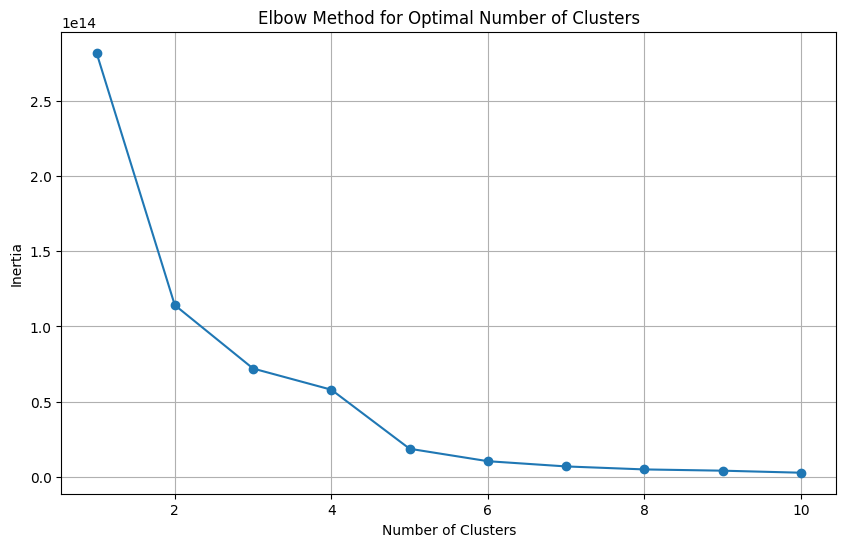

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def determine_optimal_clusters(df, max_clusters=10):
    inertia = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(df[['price']])
        inertia.append(kmeans.inertia_)
    
    # Plot the Elbow Method results
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.grid(True)
    plt.show()

    # Identify the optimal number of clusters (Elbow Point)
    optimal_clusters = inertia.index(min(inertia)) + 1  # Adjust based on analysis
    return optimal_clusters
optimal_clusters = determine_optimal_clusters(average_price_per_zip, max_clusters=10)


#### Here we have used the elnow technique, according to this, it looks liek the best number of clusters is most likeely 5 clusters, as the inertia level starts to decrease more slowly, indicating diminishing returns in reducing inertia with additional culsters

In [20]:
import pandas as pd
from sklearn.cluster import KMeans

def cluster_zip_codes_by_price(df, n_clusters):
    # Ensure price is in the correct format (numeric)
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    
    # Applying K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(df[['price']])
    
    return df

# 'average_price_per_zip' is the dataframe with zip codes and average prices that we defined above

# Step 1: Apply clustering to average prices
n_clusters = 5  # Based on the optimal number of clusters determined earlier
clustered_data = cluster_zip_codes_by_price(average_price_per_zip, n_clusters)

# Step 2: Create a mapping from zip codes to clusters
zip_to_cluster = dict(zip(clustered_data['zip_code'].astype(str), clustered_data['cluster']))

# Step 3: Map clusters to the original dataframe
# Convert zip_code to string to match the keys in zip_to_cluster
df5['zip_code'] = df5['zip_code'].astype(str)
df5['cluster'] = df5['zip_code'].map(zip_to_cluster)

# Step 4: Fill NaN values with a default value (e.g., 0)
df5['cluster'] = df5['cluster'].fillna(0).astype(int)

# Convert cluster to categorical if needed
df5['cluster'] = df5['cluster'].astype('str')

# Display the final dataframe
print(df5)


           price  bed  bath  acre_lot     street        city zip_code  \
0      1399000.0  4.0   4.0      0.06  1208853.0     Alameda    94501   
1       475000.0  1.0   1.0      0.85   294964.0     Alameda    94501   
2       999000.0  2.0   2.0      0.12   408805.0     Alameda    94501   
3      1395000.0  5.0   4.0      0.14    65968.0     Alameda    94501   
4       799000.0  2.0   2.0      0.07   446244.0     Alameda    94501   
...          ...  ...   ...       ...        ...         ...      ...   
21332  1785000.0  3.0   2.0      1.14   569148.0    Woodside    94062   
21333  1650000.0  4.0   2.0      0.23   321223.0    Woodside    94062   
21334  5400000.0  5.0   5.0      1.00   893102.0    Woodside    94062   
21335  1395000.0  3.0   2.0      0.15   556425.0  Yountville    94599   
21336  1595000.0  3.0   2.0      0.13   573315.0  Yountville    94599   

       house_size  price_per_sqft cluster  
0          2510.0      557.370518       0  
1           701.0      677.603424  

In [21]:
df5.head()

,price,bed,bath,acre_lot,street,city,zip_code,house_size,price_per_sqft,cluster
0,1399000.0,4.0,4.0,0.06,1208853.0,Alameda,94501,2510.0,557.370518,0
1,475000.0,1.0,1.0,0.85,294964.0,Alameda,94501,701.0,677.603424,0
2,999000.0,2.0,2.0,0.12,408805.0,Alameda,94501,1288.0,775.621118,0
3,1395000.0,5.0,4.0,0.14,65968.0,Alameda,94501,2396.0,582.220367,0
4,799000.0,2.0,2.0,0.07,446244.0,Alameda,94501,1287.0,620.823621,0


In [22]:
df5['cluster'].unique() # as we can see, a row belongs to 1 of 5 clusters of data.

array(['0', '3', '2', '1', '4'], dtype=object)

now we can move on to one-hot encode based on 1 of the 5 clusters

In [23]:
dummies1 = pd.get_dummies(df5.cluster)
dummies1.describe()

,0,1,2,3,4
count,21337,21337,21337,21337,21337
unique,2,2,2,2,2
top,False,False,False,False,False
freq,13090,17910,21298,12468,20582


In [24]:
df6 = pd.concat([df5,dummies1],axis = 'columns')
df6 = df6.drop('cluster', axis = 'columns') #we used  the categorical encoding and dont need this anymore
df6.head()


,price,bed,bath,acre_lot,street,city,zip_code,house_size,price_per_sqft,0,1,2,3,4
0,1399000.0,4.0,4.0,0.06,1208853.0,Alameda,94501,2510.0,557.370518,True,False,False,False,False
1,475000.0,1.0,1.0,0.85,294964.0,Alameda,94501,701.0,677.603424,True,False,False,False,False
2,999000.0,2.0,2.0,0.12,408805.0,Alameda,94501,1288.0,775.621118,True,False,False,False,False
3,1395000.0,5.0,4.0,0.14,65968.0,Alameda,94501,2396.0,582.220367,True,False,False,False,False
4,799000.0,2.0,2.0,0.07,446244.0,Alameda,94501,1287.0,620.823621,True,False,False,False,False


In [25]:
dummies2 = pd.get_dummies(df6.city)
dummies2.tail()

,Alameda,Albany,Atherton,Belmont,Belvedere,Benicia,Berkeley,Brentwood,Brisbane,Burlingame,...,South San Francisco,Suisun City,Sunnyvale,Union City,Vacaville,Vallejo,Walnut Creek,Windsor,Woodside,Yountville
21332,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
21333,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
21334,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
21335,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
21336,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [26]:
df6 = pd.concat([df6,dummies2],axis = 'columns')
df6

,price,bed,bath,acre_lot,street,city,zip_code,house_size,price_per_sqft,0,...,South San Francisco,Suisun City,Sunnyvale,Union City,Vacaville,Vallejo,Walnut Creek,Windsor,Woodside,Yountville
0,1399000.0,4.0,4.0,0.06,1208853.0,Alameda,94501,2510.0,557.370518,True,...,False,False,False,False,False,False,False,False,False,False
1,475000.0,1.0,1.0,0.85,294964.0,Alameda,94501,701.0,677.603424,True,...,False,False,False,False,False,False,False,False,False,False
2,999000.0,2.0,2.0,0.12,408805.0,Alameda,94501,1288.0,775.621118,True,...,False,False,False,False,False,False,False,False,False,False
3,1395000.0,5.0,4.0,0.14,65968.0,Alameda,94501,2396.0,582.220367,True,...,False,False,False,False,False,False,False,False,False,False
4,799000.0,2.0,2.0,0.07,446244.0,Alameda,94501,1287.0,620.823621,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21332,1785000.0,3.0,2.0,1.14,569148.0,Woodside,94062,2110.0,845.971564,False,...,False,False,False,False,False,False,False,False,True,False
21333,1650000.0,4.0,2.0,0.23,321223.0,Woodside,94062,1910.0,863.874346,False,...,False,False,False,False,False,False,False,False,True,False
21334,5400000.0,5.0,5.0,1.00,893102.0,Woodside,94062,4100.0,1317.073171,False,...,False,False,False,False,False,False,False,False,True,False
21335,1395000.0,3.0,2.0,0.15,556425.0,Yountville,94599,1353.0,1031.042129,False,...,False,False,False,False,False,False,False,False,False,True


In [27]:
df7 = df6.copy()

In [28]:
df7 = df7.drop('city', axis = 'columns')  # We drop city because we have hot-encoded the columns and no longer need the city
df7 = df7.drop('price_per_sqft', axis = 'columns') # we drop price per square foot now because it is direclty related to the price
df7 = df7.drop('zip_code', axis = 'columns') #we used the clustering to get rid of this
df7 = df7.drop('street', axis = 'columns') # street is of no value to us and is too specific
df7.head()

,price,bed,bath,acre_lot,house_size,0,1,2,3,4,...,South San Francisco,Suisun City,Sunnyvale,Union City,Vacaville,Vallejo,Walnut Creek,Windsor,Woodside,Yountville
0,1399000.0,4.0,4.0,0.06,2510.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,475000.0,1.0,1.0,0.85,701.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,999000.0,2.0,2.0,0.12,1288.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1395000.0,5.0,4.0,0.14,2396.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,799000.0,2.0,2.0,0.07,1287.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
X = df7.drop('price', axis='columns')
X.head()

,bed,bath,acre_lot,house_size,0,1,2,3,4,Alameda,...,South San Francisco,Suisun City,Sunnyvale,Union City,Vacaville,Vallejo,Walnut Creek,Windsor,Woodside,Yountville
0,4.0,4.0,0.06,2510.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1.0,1.0,0.85,701.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2.0,2.0,0.12,1288.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,5.0,4.0,0.14,2396.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2.0,2.0,0.07,1287.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [30]:
y = df7.price
y.head()

0    1399000.0
1     475000.0
2     999000.0
3    1395000.0
4     799000.0
Name: price, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=10)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Accuracy of LinearRegression on test set: {:.2f}' .format(linreg.score(X_test, y_test)))

Accuracy of LinearRegression on test set: 0.84


In [32]:
print(linreg.score(X_train, y_train), 'the test score data is: ' ,linreg.score(X_test, y_test))

0.8734230095322894 the test score data is:  0.8429043214444144


## Model Testing
***
The above shows us that it looks a little overfit as the score on the training data is a bit better then the score on the test data
we will now look at the different types of models, including lasso which will incorporate the regularization (L1 in this case) as well as the Ridge Regression model which looks at the L2 regularization function

In [33]:
def find_best_model(X,y):
    algos = {
        'linear_regression': {
            'model' : LinearRegression(),
            'params':{
               "positive": [True,False],
               "n_jobs": [2,3,4],
               "fit_intercept": [True, False]
            }
        },
        
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse','friedman_mse'],
               'splitter': ['best','random']
            
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params':{
                'alpha': [1,2],
               'selection': ['random','cyclic']
            
            }
        },
         'Ridge_Regression' : {
            'model' : Ridge(),
            'params':{
                'alpha': [0,2],
                'positive': [True,False],
                'fit_intercept': [True,False]
            }
        },
        'Random_Forest_Classifier' : {
            'model' : RandomForestRegressor(),
            'params':{
                'n_estimators': [10,20,30,40],
                'criterion': ["squared_error","absolute_error","poisson"],

            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits =5, test_size = .2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_

        })

    return pd.DataFrame(scores,columns=['model','best_score', 'best_params'])

find_best_model(X,y)

KeyboardInterrupt: 

## Model Selection
***

Based on our output table above, we can decide on the model we want to use

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=10)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Accuracy of LinearRegression on test set: {:.2f}' .format(linreg.score(X_test, y_test)))

Accuracy of LinearRegression on test set: 0.84


In [38]:
def predict_price(city,bedroom,bath,acre_lot,zip_code,sqft):
    zip_code_str = str(zip_code)
    cluster = zip_to_cluster.get(zip_code_str, 0)

    cluster=str(cluster)
    
    # Find the index for the city in your model's feature set
    city_index = np.where(X.columns == city)[0][0]
    cluster_index = np.where(X.columns == cluster)[0][0]


    x = np.zeros(len(X.columns))
    
    x[0] = bedroom
    x[1] = bath
    x[2] = acre_lot 
    x[3] = sqft
    
    if city_index >= 0:
        x[city_index] = 1
    if cluster_index >= 0:
        x[cluster_index] = 1
    return linreg.predict([x])[0]

city = 'Alameda'
bedroom = 2
bath = 2
acre_lot = 0.12
zip_code = 94501
sqft = 2510

predicted_price = predict_price(city, bedroom, bath, acre_lot, zip_code, sqft)
print(predicted_price)

1966804.3001448845


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
predict_price('Berkeley',1,1,.85,94501,701.0)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


397871.6069825515

In [ ]:
import pickle
with open('Bay_Area_House_Price_Prediction_Model.pickle', 'wb') as f:
    pickle.dump(linreg,f)

In [ ]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))
